In [1]:
import os
import os.path as path
import sys

EXAMPLE_DIR = path.abspath("")
GIT_DIR = path.split(EXAMPLE_DIR)[0]
SRC_DIR = path.join(GIT_DIR, "src")
sys.path.append(SRC_DIR)

In [2]:

import fpcore
import lambdas

from interval import Interval
from lambdas import *
from numeric_types import FP64
from plot_lambda import plot_lambda
from compare_plot_lambda import compare_plot_lambda
from fpcore.interface import *
from synthesize import synthesize, paper_synthesize
from lambdas.types import Impl


In [3]:
x = var("x")
samples = 2**17

2023-07-06 15:27:27.414516 synthesize: Finishing partial impl: (Hole (sin x) [0 (/ PI 8)])


2023-07-06 15:27:29.174887 result: WARNING: Sollya printed to stderr
2023-07-06 15:27:29.175936 result: WARNING: Sollya call failed, trying [inf - small, sup] 
2023-07-06 15:27:31.746782 result: WARNING: Sollya printed to stderr
2023-07-06 15:27:31.747601 result: WARNING: Sollya call failed, trying [inf - small, sup] 
2023-07-06 15:27:34.746056 result: WARNING: Sollya printed to stderr
2023-07-06 15:27:34.746991 result: WARNING: Sollya call failed, trying [inf - small, sup] 
2023-07-06 15:27:38.134851 result: WARNING: Sollya printed to stderr
2023-07-06 15:27:38.135733 result: WARNING: Sollya call failed, trying [inf - small, sup] 


2023-07-06 15:27:38.930165 synthesize: Finishing partial impl: (Approx (Horner (FixedPolynomial (FPCore (x)  (* 0x1.ec835e79946a31457e610231ac1d6180f0a83d3cd0dae9b5db897c2384083746a6340cb65c4b11d5b1ec03e9739998c8d8c97a34ea8113245cf9e6da96d39958p-1 x)) [-inf, inf] [1] [0x1.ec835e79946a31457e610231ac1d6180f0a83d3cd0dae9b5db897c2384083746a6340cb65c4b11d5b1ec03e9739998c8d8c97a34ea8113245cf9e6da96d39958p-1])))
2023-07-06 15:27:38.930345 synthesize: Finishing partial impl: (Approx (Horner (FixedPolynomial (FPCore (x)  (* 0x1.f48cdfd9ffbee1ab869a7e56e4cab878f650400f044e89fe17c7f60390a51990dc7e12f13bcb2411c1d9a19834cffefd586f79629870868f5722162d829d1a2ap-1 x)) [-inf, inf] [1] [0x1.f48cdfd9ffbee1ab869a7e56e4cab878f650400f044e89fe17c7f60390a51990dc7e12f13bcb2411c1d9a19834cffefd586f79629870868f5722162d829d1a2ap-1])))
2023-07-06 15:27:38.930375 synthesize: Finishing partial impl: (Approx (Horner (FixedPolynomial (FPCore (x)  (* 0x1.f6332dc49ecf5d57f69304d78714513688ed178a32ad6a344338cf1c2ecf7d354c

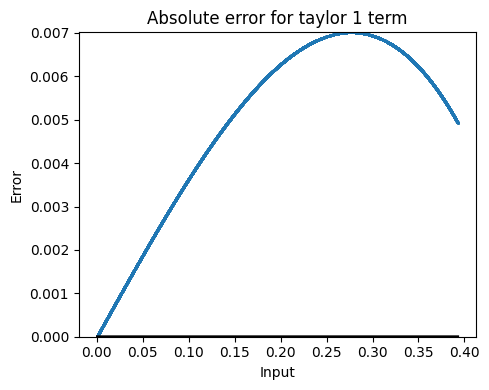

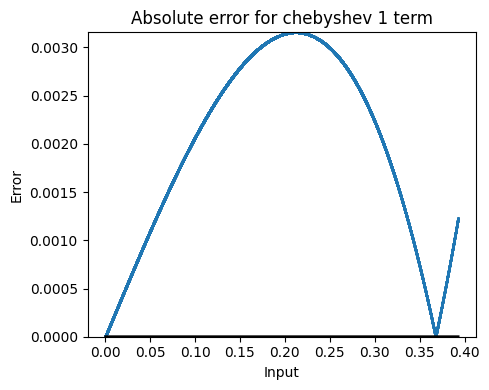

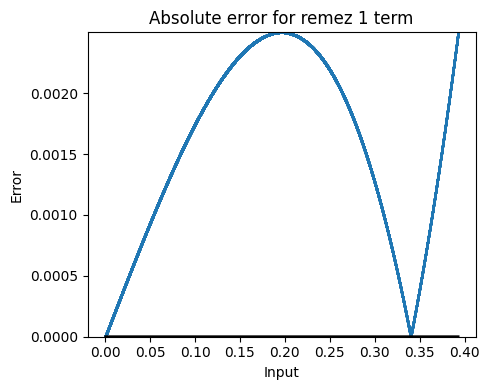

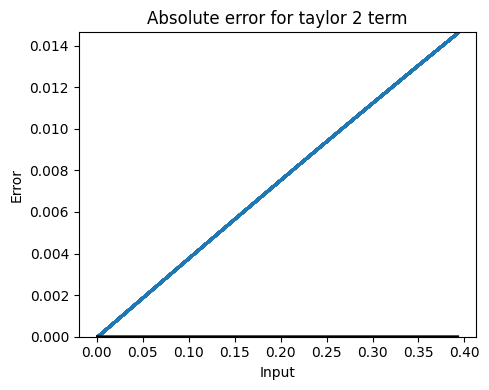

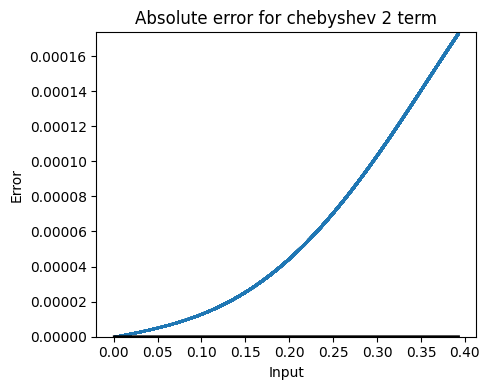

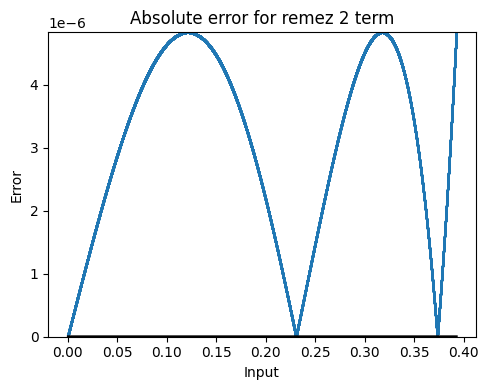

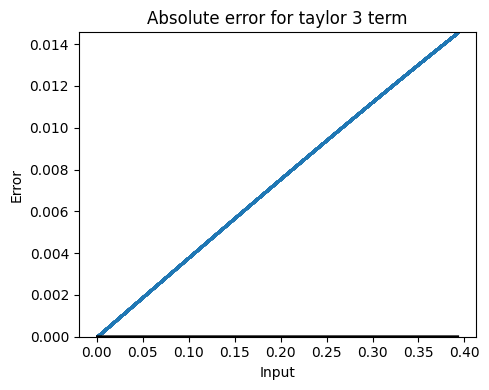

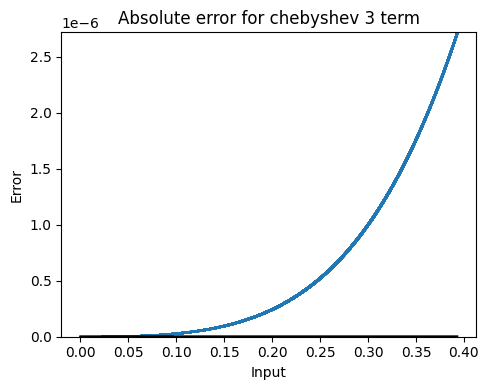

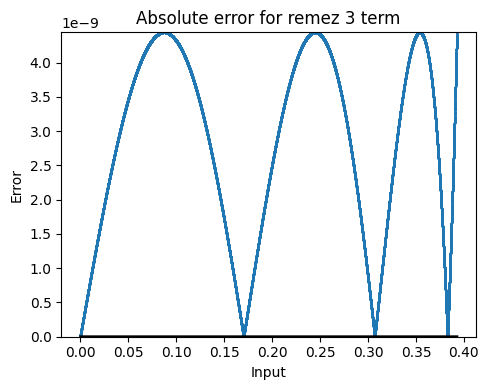

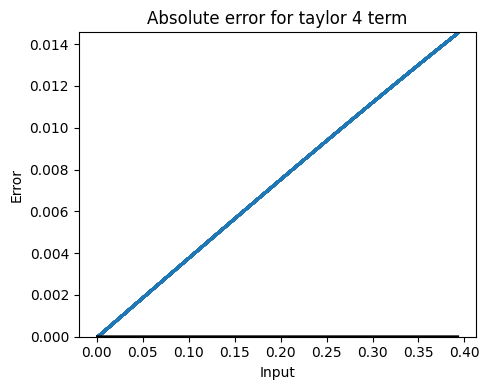

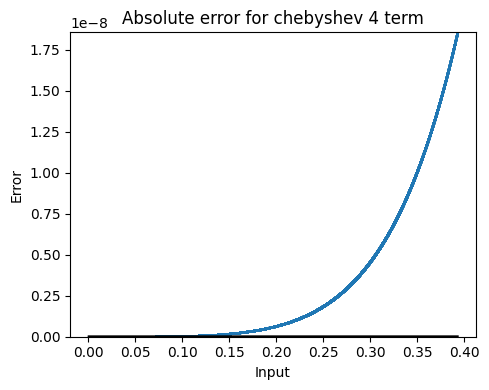

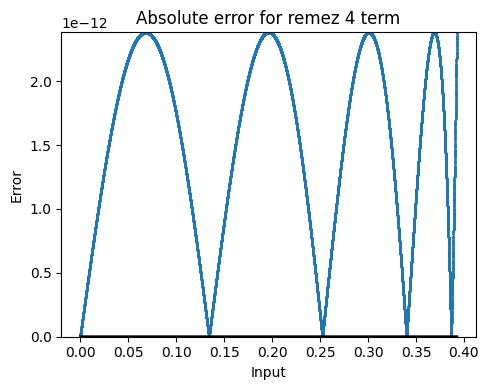

In [8]:
h = Hole(Impl(make_function([x], sin(x)), Interval(0, PI/8)))
versions = paper_synthesize(h, tools=["taylor", "chebyshev", "remez"], terms=[1,2,3,4])

for i,v in enumerate(versions):
    tool = ["taylor", "chebyshev", "remez"][i%3]
    terms = int(i/3) + 1
    plot_lambda(Interval(0, PI/8), v, f"{tool} {terms} term", samples)